Desafio #2

Alumno: Yandri Uchuari Gallardo

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompati

In [ ]:
import gensim.downloader as api

# Cargar dataset text8 (Wikipedia simplificada)
dataset = api.load("text8")  # Iterable de oraciones tokenizadas
data = list(dataset)  # Convertir a lista
print(f"Número de oraciones: {len(data)}")
print(f"Ejemplo: {data[0][:20]}")


[==================================================] 100.0% 31.6/31.6MB downloaded
Número de oraciones: 1701
Ejemplo: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']


In [ ]:
from gensim.models import Word2Vec

# Entrenar modelo propio Word2Vec
modelo_w2v = Word2Vec(
    sentences=data,
    vector_size=100,  # dimensión del embedding
    window=5,         # contexto
    min_count=5,      # frecuencia mínima de palabras
    workers=4,        # hilos
    sg=0              # 0=CBOW, 1=Skip-gram
)

# Guardar modelo si lo deseas
modelo_w2v.save("modelo_word2vec_text8.model")


In [ ]:
palabras_interes = ["king", "woman", "computer", "space", "god"]
for palabra in palabras_interes:
    if palabra in modelo_w2v.wv:
        print(f"\nPalabra base: {palabra}")
        for similar, score in modelo_w2v.wv.most_similar(palabra, topn=5):
            print(f"  -> {similar:15s} similitud={score:.4f}")
    else:
        print(f"'{palabra}' no está en el vocabulario")



Palabra base: king
  -> prince          similitud=0.7274
  -> emperor         similitud=0.7236
  -> kings           similitud=0.6961
  -> throne          similitud=0.6923
  -> queen           similitud=0.6920

Palabra base: woman
  -> child           similitud=0.7736
  -> girl            similitud=0.7680
  -> man             similitud=0.7514
  -> person          similitud=0.6870
  -> lady            similitud=0.6755

Palabra base: computer
  -> computers       similitud=0.7305
  -> computing       similitud=0.7094
  -> console         similitud=0.6816
  -> hardware        similitud=0.6706
  -> programmer      similitud=0.6580

Palabra base: space
  -> spacecraft      similitud=0.6670
  -> satellites      similitud=0.5879
  -> orbit           similitud=0.5838
  -> spaces          similitud=0.5818
  -> probes          similitud=0.5714

Palabra base: god
  -> divine          similitud=0.8107
  -> yahweh          similitud=0.7979
  -> spirit          similitud=0.7905
  -> christ          

In [ ]:
# Analogía: rey - hombre + mujer ≈ reina
if all(w in modelo_w2v.wv for w in ["king", "man", "woman"]):
    result = modelo_w2v.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
    print("\nAnalogía: king - man + woman ≈", result)

# Analogía: paris - france + germany ≈ berlin
if all(w in modelo_w2v.wv for w in ["paris", "france", "germany"]):
    result = modelo_w2v.wv.most_similar(positive=["paris", "germany"], negative=["france"], topn=1)
    print("Analogía: paris - france + germany ≈", result)



Analogía: king - man + woman ≈ [('queen', 0.657353401184082)]
Analogía: paris - france + germany ≈ [('berlin', 0.8082926869392395)]


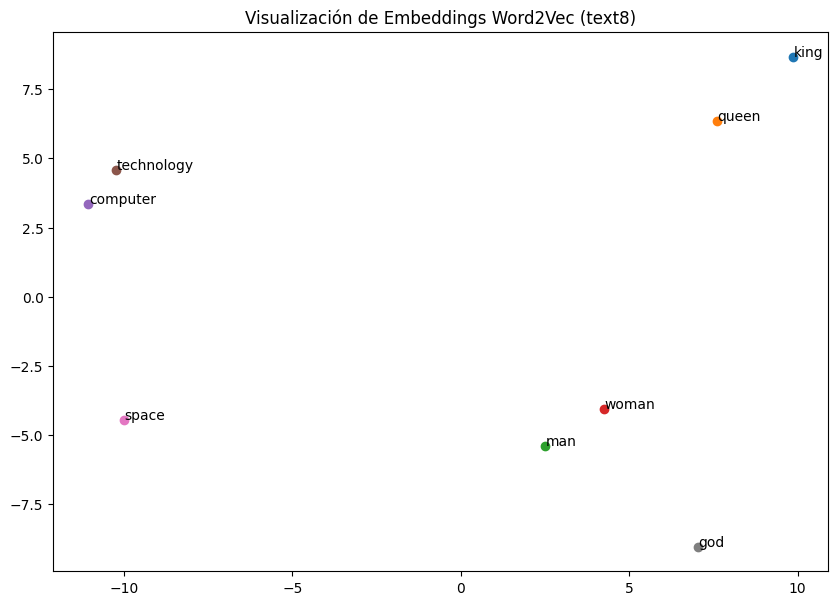

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selección de palabras para graficar
palabras_grafico = ["king", "queen", "man", "woman", "computer", "technology", "space", "god"]
vectores = [modelo_w2v.wv[w] for w in palabras_grafico if w in modelo_w2v.wv]
etiquetas = [w for w in palabras_grafico if w in modelo_w2v.wv]

# Reducir dimensión a 2D con PCA
pca = PCA(n_components=2)
reducidos = pca.fit_transform(vectores)

# Graficar
plt.figure(figsize=(10, 7))
for i, palabra in enumerate(etiquetas):
    plt.scatter(reducidos[i, 0], reducidos[i, 1])
    plt.text(reducidos[i, 0]+0.01, reducidos[i, 1]+0.01, palabra)
plt.title("Visualización de Embeddings Word2Vec (text8)")
plt.show()
